<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Project_1/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
play_store_df = pd.read_csv('/content/drive/MyDrive/csv data files/Play Store Data.csv')
user_review_df = pd.read_csv('/content/drive/MyDrive/csv data files/User Reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
play_store_df_rows = play_store_df.shape[0]
play_store_df_columns = play_store_df.shape[1]
print(f"Number of rows in play_store_df is {play_store_df_rows} and columns is {play_store_df_columns}.")

Number of rows in play_store_df is 10841 and columns is 13.


In [7]:
user_review_df_rows = user_review_df.shape[0]
user_review_df_columns = user_review_df.shape[1]
print(f"Number of rows in user_review_df is {user_review_df_rows} and columns is {user_review_df_columns}.")

Number of rows in user_review_df is 64295 and columns is 5.


### Dataset Information

In [8]:
# Dataset Info
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
def duplicate_value_count(data):
  list1 = []
  duplicate_values = 0
  for i in data:
    if i in list1:
      duplicate_values += 1
    else:
      list1.append(i)
  return duplicate_values


In [11]:
duplicate_value_count(play_store_df['App'])

1181

In [12]:
duplicate_value_count(play_store_df['Category'])

10807

In [13]:
duplicate_value_count(play_store_df['Genres'])

10721

In [14]:
duplicate_value_count(play_store_df['Type'])

10837

In [15]:
duplicate_value_count(user_review_df['App'])

63221

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count

null_value_count = play_store_df.isnull().sum().sum()
print(f"Number of null values in the play store dataframe is {null_value_count}.")

Number of null values in the play store dataframe is 1487.


In [17]:
null_value_count = user_review_df.isnull().sum().sum()
print(f"Number of null values in the user review dataframe is {null_value_count}.")

Number of null values in the user review dataframe is 107457.


In [18]:
bool_df_1 = play_store_df.isnull()
column_name_list_1 = list(play_store_df.columns)
null_value_list_1=[]

for i in column_name_list_1:  
  null_value = (bool_df_1[i]==True).sum()
  null_value_list_1.append(null_value)
  
print(column_name_list_1)
print(null_value_list_1)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
[0, 0, 1474, 0, 0, 0, 1, 0, 1, 0, 0, 8, 3]


In [19]:
bool_df_2 = user_review_df.isnull()
column_name_list_2 = list(user_review_df.columns)
null_value_list_2=[]

for i in column_name_list_2:  
  null_value = (bool_df_2[i]==True).sum()
  null_value_list_2.append(null_value)
  
print(column_name_list_2)
print(null_value_list_2)

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
[0, 26868, 26863, 26863, 26863]


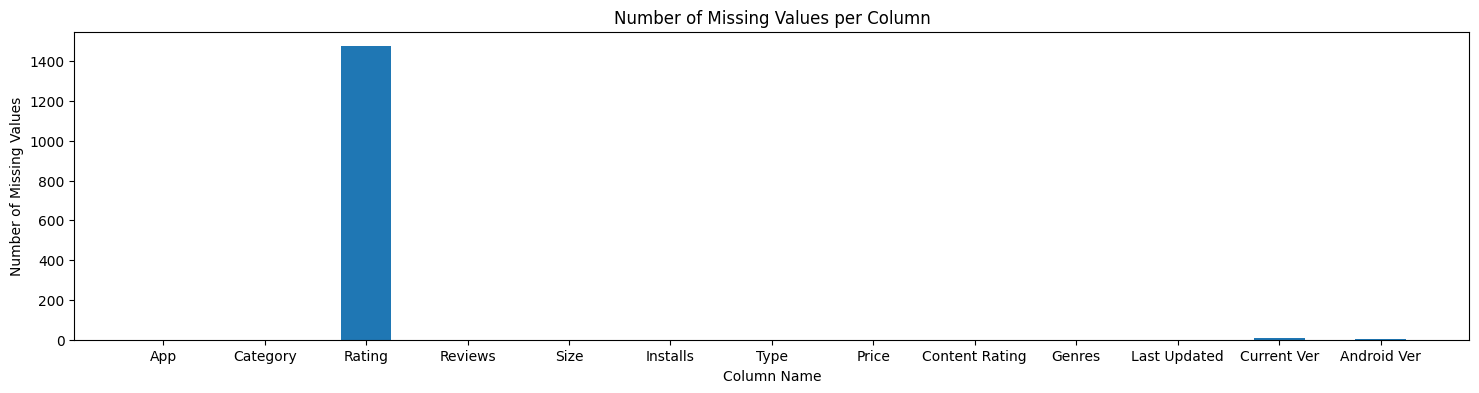

In [20]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (18, 4)
bar_width = 0.50
plt.bar(column_name_list_1, null_value_list_1, width = bar_width)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')

plt.show()

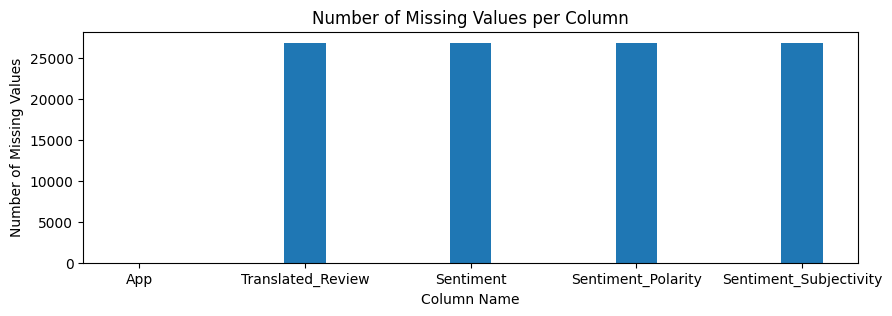

In [21]:
plt.rcParams['figure.figsize'] = (10, 3)
bar_width = 0.25
plt.bar(column_name_list_2, null_value_list_2, width = bar_width)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')

plt.show()

### What did you know about your dataset?

About the Play store dataframe I got to know the following things-
1) 

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
pd.DataFrame(play_store_df.columns,columns = ['Variables of Playstore DataFrame'])

,Variables of Playstore DataFrame
0,App
1,Category
2,Rating
3,Reviews
4,Size
5,Installs
6,Type
7,Price
8,Content Rating
9,Genres


In [23]:
pd.DataFrame(user_review_df.columns,columns = ['Variables of User Review DataFrame'])

,Variables of User Review DataFrame
0,App
1,Translated_Review
2,Sentiment
3,Sentiment_Polarity
4,Sentiment_Subjectivity


In [24]:
# Dataset Describe
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [25]:
user_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

**Description of the variables of play store dataset.**
1.   App:- The name of the mobile application that the variables describe.
2.   Category:- The category to which the app belongs, such as Games, Social, Productivity, etc.
3.   Rating:- The average user rating for the app, usually on a scale of 1 to 5 stars.
4.   Reviews:- The number of user reviews/ratings the app has received.
5.   Size:- The size of the app in MB.
6.   Installs:- Number of installation on Android devices.
7.   Type:- Whether the app is free or paid.
8.   Price:- The cost of the app if it is not free.
9.   Content Rating:- The age group for which the app is suitable, such as Everyone, Teen, Mature, etc.
10.   Genres:- The primary genre or category to which the app belongs, such as Action, Puzzle, Communication, etc.
11.  Last Updated:- The date when the app was last updated.
12.  Current Ver:- The current version of the app.
13.  Android Ver:- The minimum version of the Android required to run the app.

**Description of the variables of user review dataset.**
1.   App:- The name of the mobile application that the variables describe.
2.   Translated_Review:- The text review of the mobile application in translated language.
3.   Sentiment:- The sentiment of the translated review, which can be Positive, Negative or Neutral.
4.   Sentiment_Polarity:- The polarity of the sentiment expressed in the translated review. It can be a value between -1 (negative sentiment) to 1 (positive sentiment), with 0 being neutral.
5.   Sentiment_Subjectivity:- The degree of subjectivity in the translated review sentiment, which can range from 0 (objective) to 1 (subjective).

### Check Unique Values for each variable of play store dataset.

In [26]:
# Check Unique Values for each variable.
variable_list = list(play_store_df.columns)

def check_unique_values(variable):
  unique_values = play_store_df[variable].unique()
  return unique_values

In [27]:
pd.DataFrame(check_unique_values(variable_list[0]),columns = ['Unique Apps'])

,Unique Apps
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
9655,Sya9a Maroc - FR
9656,Fr. Mike Schmitz Audio Teachings
9657,Parkinson Exercices FR
9658,The SCP Foundation DB fr nn5n


In [28]:
pd.DataFrame(check_unique_values(variable_list[1]),columns = ['Unique Category'])

,Unique Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [29]:
pd.DataFrame(check_unique_values(variable_list[2]),columns = ['Unique Rating'])

,Unique Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
5,4.4
6,3.8
7,4.2
8,4.6
9,3.2


In [30]:
pd.DataFrame(check_unique_values(variable_list[3]),columns = ['Unique Reviews'])

,Unique Reviews
0,159
1,967
2,87510
3,215644
4,167
...,...
5997,885
5998,88486
5999,603
6000,1195


In [31]:
pd.DataFrame(check_unique_values(variable_list[4]),columns = ['Unique Size'])

,Unique Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
457,552k
458,885k
459,1020k
460,582k


In [32]:
pd.DataFrame(check_unique_values(variable_list[5]),columns = ['Unique Installs'])

,Unique Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
5,"50,000+"
6,"1,000,000+"
7,"10,000,000+"
8,"5,000+"
9,"100,000,000+"


In [33]:
pd.DataFrame(check_unique_values(variable_list[6]),columns = ['Unique Type'])

,Unique Type
0,Free
1,Paid
2,NaN
3,0


In [34]:
pd.DataFrame(check_unique_values(variable_list[7]),columns = ['Unique Price'])

,Unique Price
0,0
1,$4.99
2,$3.99
3,$6.99
4,$1.49
...,...
88,$394.99
89,$1.26
90,Everyone
91,$1.20


In [35]:
pd.DataFrame(check_unique_values(variable_list[8]),columns = ['Unique Content Rating'])

,Unique Content Rating
0,Everyone
1,Teen
2,Everyone 10+
3,Mature 17+
4,Adults only 18+
5,Unrated
6,NaN


In [36]:
pd.DataFrame(check_unique_values(variable_list[9]),columns = ['Unique Genres'])

,Unique Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design;Creativity
3,Art & Design;Action & Adventure
4,Auto & Vehicles
...,...
115,Strategy;Education
116,Racing;Pretend Play
117,Communication;Creativity
118,"February 11, 2018"


In [37]:
pd.DataFrame(check_unique_values(variable_list[10]),columns = ['Unique Last Updated'])

,Unique Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
1373,"November 25, 2014"
1374,"May 19, 2016"
1375,"January 20, 2014"
1376,"February 16, 2014"


In [38]:
pd.DataFrame(check_unique_values(variable_list[11]),columns = ['Unique Current Ver'])

,Unique Current Ver
0,1.0.0
1,2.0.0
2,1.2.4
3,Varies with device
4,1.1
...,...
2828,6.04
2829,1.5.447
2830,1.0.612928
2831,0.3.4


In [39]:
pd.DataFrame(check_unique_values(variable_list[12]),columns = ['Unique Android Ver'])

,Unique Android Ver
0,4.0.3 and up
1,4.2 and up
2,4.4 and up
3,2.3 and up
4,3.0 and up
5,4.1 and up
6,4.0 and up
7,2.3.3 and up
8,Varies with device
9,2.2 and up


### Check Unique Values for each variable of user review dataset.

In [40]:
variable_list = list(user_review_df.columns)

def check_unique_values(variable):
  unique_values = user_review_df[variable].unique()
  return unique_values

In [41]:
pd.DataFrame(check_unique_values(variable_list[0]),columns = ['Unique Apps'])

,Unique Apps
0,10 Best Foods for You
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室
2,11st
3,1800 Contacts - Lens Store
4,1LINE – One Line with One Touch
...,...
1069,Hotspot Shield Free VPN Proxy & Wi-Fi Security
1070,Hotstar
1071,Hotwire Hotel & Car Rental App
1072,Housing-Real Estate & Property


In [42]:
pd.DataFrame(check_unique_values(variable_list[1]),columns = ['Unique Translated Review'])

,Unique Translated Review
0,I like eat delicious food. That's I'm cooking ...
1,This help eating healthy exercise regular basis
2,NaN
3,Works great especially going grocery store
4,Best idea us
...,...
27990,Most ads older many agents ..not much owner po...
27991,"If photos posted portal load, fit purpose. I'm..."
27992,"Dumb app, I wanted post property rent give opt..."
27993,I property business got link SMS happy perform...


In [43]:
pd.DataFrame(check_unique_values(variable_list[2]),columns = ['Unique Sentiment'])

,Unique Sentiment
0,Positive
1,NaN
2,Neutral
3,Negative


In [44]:
pd.DataFrame(check_unique_values(variable_list[3]),columns = ['Unique Sentiment_Polarity'])

,Unique Sentiment_Polarity
0,1.000000
1,0.250000
2,NaN
3,0.400000
4,0.600000
...,...
5406,0.183929
5407,0.359167
5408,-0.528571
5409,-0.377778


In [45]:
pd.DataFrame(check_unique_values(variable_list[4]),columns = ['Unique Sentiment_Subjectivity'])

,Unique Sentiment_Subjectivity
0,0.533333
1,0.288462
2,NaN
3,0.875000
4,0.300000
...,...
4470,0.506122
4471,0.517262
4472,0.511458
4473,0.717262


## 3. ***Data Wrangling***

### Data Wrangling Code

**Merge the two datasets on the common column 'App.**

In [46]:
user_review_df = user_review_df.rename(columns={'App': 'App_Name'})
play_store_df = play_store_df.rename(columns={'App': 'App_Name'})

In [47]:
merged_df = pd.merge(play_store_df, user_review_df, on='App_Name', how='inner')

**Changing some column values to numrical.**

In [48]:
merged_df['Size'] = pd.to_numeric(merged_df['Size'], errors='coerce')

In [49]:
merged_df['Price'] = merged_df['Price'].replace('$', '')
merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors='coerce')

In [50]:
merged_df['Installs'] = merged_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
# merged_df['Installs'] = merged_df['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(int)


<ipython-input-50-c25cff384d5b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['Installs'] = merged_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


**Convert 'Last Updated' column to datetime**

In [51]:
merged_df['Last Updated'] = pd.to_datetime(merged_df['Last Updated'])

merged_df['Year'] = merged_df['Last Updated'].dt.year
merged_df['Month'] = merged_df['Last Updated'].dt.month
merged_df['Day'] = merged_df['Last Updated'].dt.day

**Top rated apps**

In [52]:
top_rated_apps = merged_df.groupby('App_Name')['Rating'].mean().sort_values(ascending=True)
top_apps = top_rated_apps.tail(25) 

top_apps_categories = []
top_apps_ratings = []
for app in top_apps.index:
    category = merged_df.loc[merged_df['App_Name'] == app, 'Category'].iloc[0]
    rating = merged_df.loc[merged_df['App_Name'] == app, 'Rating'].iloc[0]
    top_apps_categories.append(category)
    top_apps_ratings.append(rating)

top_apps_df = pd.DataFrame({'App_Name': top_apps.index, 'Category': top_apps_categories, 'Rating': top_apps_ratings})


**Correlation between app size and rating**

In [53]:
correlation = merged_df['Size'].corr(merged_df['Rating'])

print("Correlation coefficient between Size and Rating:", correlation)

Correlation coefficient between Size and Rating: nan


**Distribution of ratings by content rating**

In [54]:
rating_counts = merged_df['Content Rating'].value_counts()
rating_counts

Everyone           89635
Teen               17440
Everyone 10+        8060
Mature 17+          7487
Adults only 18+       40
Name: Content Rating, dtype: int64

**Sentiment analysis by genre**

In [55]:
average_sentiment = merged_df.groupby('Genres')['Sentiment_Polarity'].mean()
sentiment_df = pd.DataFrame({'Genres': average_sentiment.index, 'Average Sentiment': average_sentiment})
sentiment_df = sentiment_df.sort_values('Average Sentiment', ascending=False)

**Trend of average app ratings over time**

In [56]:
average_ratings = merged_df.groupby(merged_df['Last Updated'].dt.year)['Rating'].mean()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

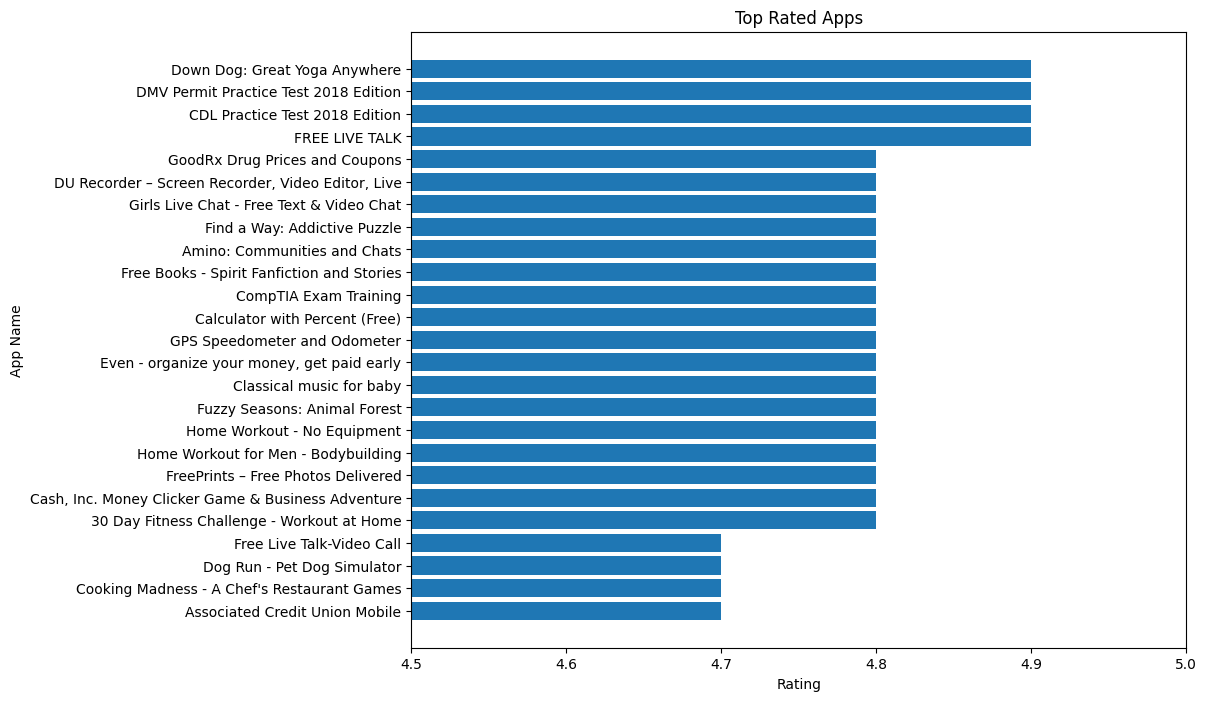

In [57]:
plt.figure(figsize=(10, 8))
plt.barh(top_apps_df['App_Name'], top_apps_df['Rating'])

plt.xlabel('Rating')
plt.ylabel('App Name')
plt.title('Top Rated Apps')
plt.xticks([4.5, 4.6, 4.7, 4.8, 4.9, 5.0])
plt.xlim(4.5, 5.0)

plt.show()

##### 1. Why did you pick the specific chart?


I picked this bar chart, which has the horizontal bars, because of the following reasons:-

1.  A horizontal bar chart allows for easy visual comparison of the ratings among different apps. The lengths of the bars represent the ratings, and it's easy to compare the lengths to identify the highest-rated apps.

2.  The horizontal orientation of the bars allows for a clear ranking of the apps based on their ratings. The apps with higher ratings will have longer bars, indicating their higher position in the ranking.

3.  The horizontal orientation of the bars makes it easier to read the app names on the y-axis, especially when the app names are long. This ensures that the chart is more readable and informative.

Overall, the horizontal bar chart is a suitable choice for showcasing the top-rated apps and their corresponding ratings, providing a clear and visually appealing representation of the data.

##### 2. What is/are the insight(s) found from the chart?

From the horizontal bar chart representing the top-rated apps overall, we can derive the following insights:
1.   The chart clearly shows the top-rated apps based on their ratings. The apps listed at the top of the chart have the highest ratings, indicating that they are highly regarded by users.
2.   The chart can help identify the apps that have consistently high ratings, indicating their strong performance and user satisfaction. These apps may have certain features or qualities that resonate well with users.
3.   By examining the chart, we may identify patterns or trends related to the app categories or genres. For example, if certain categories consistently appear among the top-rated apps, it suggests that users highly value apps in those categories.

Overall, the chart provides insights into the highest-rated apps, their ratings, and potential patterns or trends in app ratings, allowing for a better understanding of user preferences and app performance.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the top-rated apps chart can potentially create a positive business impact in the following ways:

1.   By analyzing the highest-rated apps, businesses can identify the features and qualities that users value the most. This information can guide the development of new apps or the improvement of existing ones, leading to enhanced user satisfaction and potentially attracting more users.
2.   The chart provides insights into the performance of competing apps and their ratings. This information can help businesses understand their position in the market and identify opportunities to differentiate their apps based on user preferences and needs.
3.  The high ratings of certain apps indicate positive user feedback and satisfaction. By understanding the reasons behind these ratings, businesses can gain insights into what aspects of their apps are resonating well with users. This feedback can be used to optimize app features, user experience, and customer support, ultimately leading to improved customer satisfaction and loyalty.

There are some insights that lead to negative growth:

1.  If businesses solely focus on the top-rated apps and neglect those with lower ratings, they may miss out on valuable feedback and improvement opportunities. It is important to analyze lower-rated apps to identify areas for enhancement and address any user concerns to prevent negative growth.
2.  While the top-rated apps provide valuable insights, it is crucial to also consider broader market trends and user preferences. Relying solely on the current highest-rated apps without adapting to changing market demands may result in stagnant growth or loss of relevance over time.

In summary, the gained insights can have a positive business impact when utilized effectively to enhance app development, user satisfaction, and competitiveness. However, it is important to consider a holistic approach, address lower-rated apps, and adapt to market trends to avoid negative growth.


#### Chart - 2

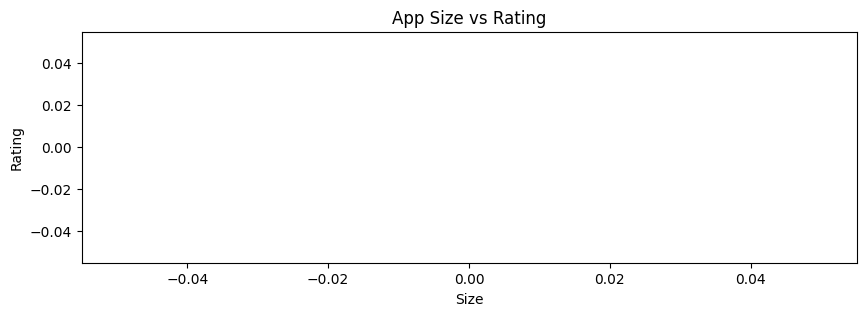

In [58]:
plt.scatter(merged_df['Size'], merged_df['Rating'],s=20)

plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('App Size vs Rating')
plt.show()

##### 1. Why did you pick the specific chart?

 I picked the scatter plot as it is an effective visualization tool to visualize the relationship between the app size and its rating. A scatter plot is commonly used to display the correlation or pattern between two continuous variables. In this scenario, the app size (continuous variable) is plotted on the x-axis, the rating (continuous variable) is plotted on the y-axis, and each dot represents an app.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, the following insights can be derived:

1.  The majority of apps in the dataset have sizes less than 100MB. This indicates that app developers often prioritize keeping their apps relatively small in terms of storage space requirements.

2.  The ratings of the apps in the dataset mostly falls between 4 and 4.8. This suggests that users tend to rate apps positively, with a significant number of apps receiving high ratings.

3.  The scatter plot shows a higher concentration of apps with smaller sizes (less than 100MB) and ratings between 4 and 4.8. This concentration suggests that many popular apps are relatively compact in size and receive positive ratings from users.

These insights provide a better understanding of the relationship between app size and rating within the dataset, indicating that other factors beyond app size likely influence user ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot can potentially help in creating a positive business impact:


1.   The scatter plot provides insights into the distribution of app ratings across different sizes. This understanding of user preferences can guide app developers and businesses in prioritizing the development of apps that align with user expectations. By focusing on features, functionality, and user experience rather than just app size, businesses can create apps that are more likely to receive positive ratings and attract a larger user base.
2.   The scatter plot reveals that the majority of apps have smaller sizes. This information can be valuable for businesses in terms of optimizing their app size. By keeping the app size relatively small, developers can ensure quicker downloads, lower storage requirements for users, and improved performance, which can contribute to a positive user experience and higher ratings.

As for insights that could potentially lead to negative growth, there are no specific insights from the scatter plot that suggest negative implications. However, it's important to note that excessively large app sizes may result in slower downloads, increased storage requirements, and potential user frustration. Therefore, businesses should be cautious about creating unnecessarily large apps that could negatively impact user experience and ratings.



#### Chart - 3

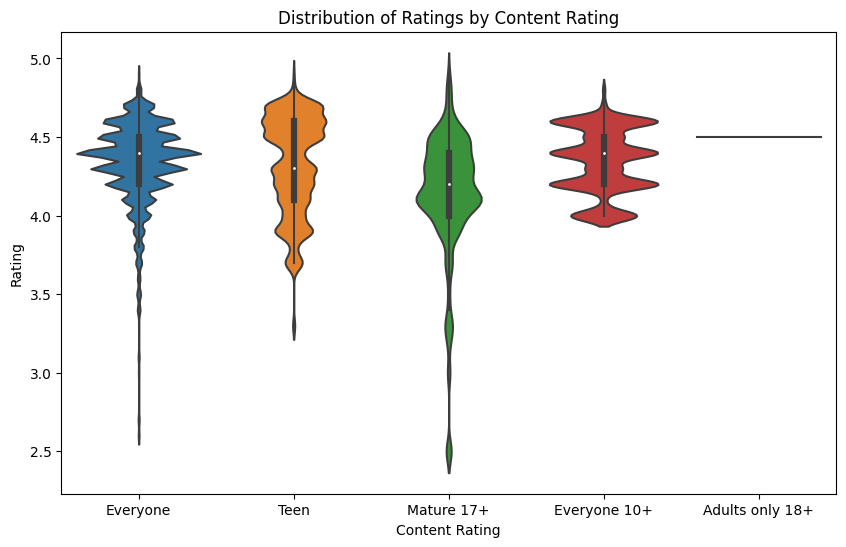

In [59]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='Content Rating', y='Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Content Rating')
plt.show()

##### 1. Why did you pick the specific chart?

 The reason for choosing the violin plot is that it effectively represents the distribution of app ratings across different content ratings. The violin plot displays the kernel density estimation of the data, allowing us to see the shape, peaks, and variations in the ratings distribution for each content rating category.

 By using the violin plot, we can easily compare the distributions of app ratings across different content ratings. It provides a visual representation of the spread and concentration of ratings within each category. 
 
 The width of the violin plot indicates the density of ratings, with wider sections indicating more data points.

##### 2. What is/are the insight(s) found from the chart?

From the violin plot we can gather several insights:

1.   The majority of apps across all content ratings tend to have ratings concentrated around the higher end, indicating that users generally rate apps positively.
2.  The mature 17+ category has the highest range of app ratings, indicating a wider spread of ratings within this category. This suggests that there is a significant variation in the quality and user satisfaction of apps in this category.
3.  The everyone and everyone 10+ categories have relatively narrower spreads, indicating a more consistent range of ratings. This suggests that apps in these categories tend to receive more consistent ratings from users.
4.  The teen category shows a wide spread of ratings towards the higher end, indicating that there are a significant number of high rated apps in this category. This suggests that the teen category offers a good selection of high-quality apps.

So, the insights from the chart suggest that the content rating of an app can have an impact on its rating distribution. The wider spreads and variations in ratings across different content ratings highlight the importance of understanding and targeting specific audience demographics for app development and marketing.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the distribution of app ratings across different content ratings can potentially help create a positive business impact:


1.   Understanding the wider spread of ratings in the mature 17+ category can help businesses focus on developing and promoting high-quality apps that cater to the preferences and expectations of adult users. By providing engaging and valuable content within this category, businesses can attract a larger audience and potentially generate higher revenue.
2.   Identifying the wider spread of ratings towards the higher end in the teen category indicates the presence of highly rated apps in this segment. This insight presents an opportunity for businesses to develop and market apps specifically targeted towards teenagers, leveraging the popularity and positive reputation of existing successful apps in this category.


Regarding potential negative growth, the insights themselves do not directly indicate any negative impact. However, it is crucial for businesses to consider factors such as competition, market saturation, and user feedback when making decisions based on these insights. Neglecting these factors or failing to adapt to changing market dynamics can lead to negative growth. 



#### Chart - 4

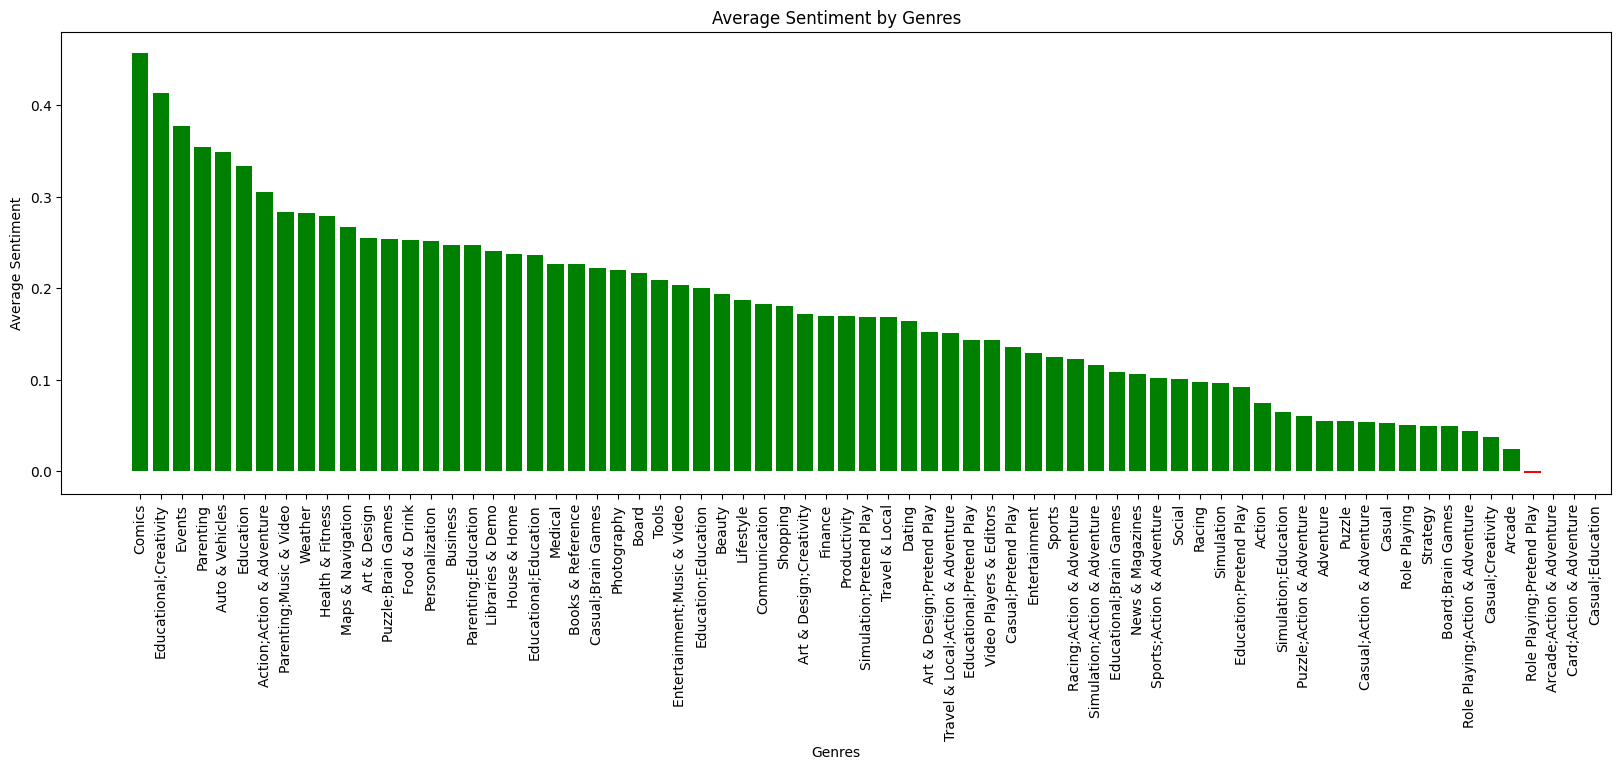

In [83]:
colors = ['green' if polarity >= 0 else 'red' for polarity in sorted_genres]

plt.figure(figsize=(20, 6))
plt.bar(sentiment_df['Genres'], sentiment_df['Average Sentiment'], color=colors)
plt.xlabel('Genres')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Genres')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this stacked bar chart because the genres in the dataset are categorical data, meaning they represent distinct categories or groups. A bar chart is commonly used to display and compare categorical data, as it visually separates each category and facilitates easy comprehension.

 Bar charts maintain the order of categories, which is useful in this case. By sorting the genres based on their average sentiment polarity, you can see the genres arranged from the most positive to the most negative in a clear and intuitive manner.

 The x-axis of a bar chart provides space for labeling each genre, which is important in this analysis to ensure clarity and readability. The rotation of the x-axis labels helps accommodate longer genre names without overlapping or becoming unreadable.

##### 2. What is/are the insight(s) found from the chart?

 The following insights can be derived:

1.   The majority of genres (except the last four) have green bars, indicating positive sentiment polarity. This suggests that users generally have more positive reviews for apps across a wide range of genres.
2.   The last three genres have neither green nor red bars, suggesting that they have an average sentiment polarity close to zero. This indicates a more neutral sentiment or a balance between positive and negative reviews for these genres.
3.  Although most genres have positive sentiment polarity, there may be variations in the intensity or degree of positivity among them. Some genres might receive higher positive sentiment scores than others, indicating that certain genres tend to receive more enthusiastic or favorable reviews from users.
4.  while the majority of genres receive positive sentiment, the genre "Role Playing: Pretend Play" may receive slightly more negative reviews. It indicates that there might be certain aspects or characteristics within the apps belonging to this genre that are more likely to elicit negative feedback from users.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [61]:
merged_df.head()

,App_Name,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Year,Month,Day
0,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,2018,1,15
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,2018,1,15
2,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,2018,1,15
3,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN,2018,1,15
4,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,2018,1,15


Answer Here

#### Chart - 5

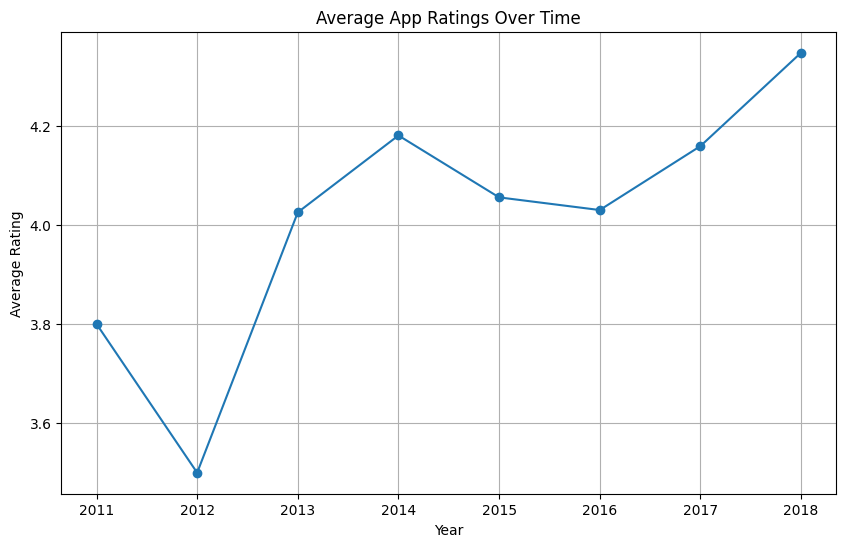

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(average_ratings.index, average_ratings, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average App Ratings Over Time')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [63]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [64]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [65]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [66]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [67]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [68]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [69]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [70]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [71]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [72]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***